# FAKE NEWS DETECTION PROJECT

### Loading the dataset 

In [1]:
import pandas as pd

df = pd.read_csv("fake_news_kaggle/train.csv")
df.dropna(inplace = True)

In [2]:
print("Shape of News data:", df.shape)
print("News data columns", df.columns)

Shape of News data: (18285, 5)
News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [3]:
display(df)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


0    10361
1     7924
Name: label, dtype: int64


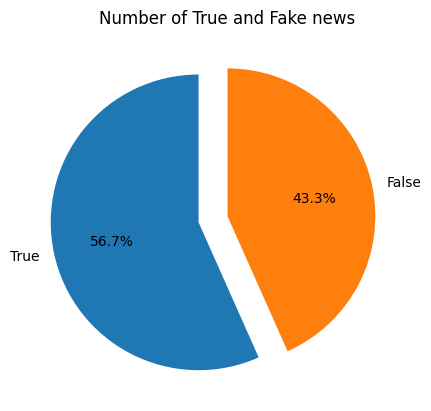

In [4]:
import matplotlib.pyplot as plt

print(df.label.value_counts())
plt.title("Number of True and Fake news")
plt.pie(df.label.value_counts(),labels=["True","False"],autopct='%1.1f%%',explode =[0.2,0], startangle=90)
plt.show()

In [5]:
df.text=df.title+" "+df.author+" "+df.text

In [6]:
df=df.drop(['id','title','author'],axis=1)

In [7]:
text_length = df.text.str.split().str.len()
text_length.describe()

count    18285.000000
mean       818.056440
std        886.831104
min          4.000000
25%        318.000000
50%        625.000000
75%       1110.000000
max      24245.000000
Name: text, dtype: float64

In [8]:
percentile25 = text_length.quantile(.1)
percentile75 = text_length.quantile(.99)

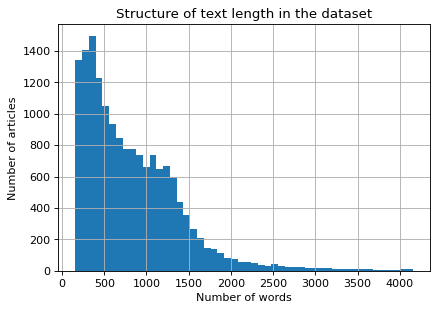

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(6, 4), dpi=80)
plt.hist(text_length,bins=50,range=(percentile25, percentile75))
plt.ylabel('Number of articles')
plt.xlabel('Number of words')
plt.title('Structure of text length in the dataset')
plt.grid(True)
plt.show()

## Cleaning data

### Remove all besides text (mainly punctuaction)

In [10]:
df.text = df.text.str.replace('[^\w\s]','',regex=True)

### Lowering the text

In [11]:
df.text = df.text.str.lower()

### Tokenization

In [12]:
df['text']=df.apply(lambda row: row['text'].split(),axis=1)

### Stopwords removal

In [13]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stopwords = [word.replace('\'','') for word in stopwords]
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

In [14]:
df['text']=df.apply(lambda row: [word for word in row['text'] if not word in stopwords],axis=1)

### Stemming

In [15]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
df['text']=df.apply(lambda row: [porter_stemmer.stem(word) for word in row['text']],axis=1)

## Data exploration

In [16]:
true_df=df[df["label"]==0]
true_df = true_df.drop('label', axis=1)
false_df=df[df["label"]==1]
false_df = false_df.drop('label', axis=1)

### Wordcount barplot true/false

In [29]:
true_counter = true_df.explode('text').value_counts()
false_counter = false_df.explode('text').value_counts()

In [30]:
true_counter = true_counter.to_frame().reset_index()
true_counter = true_counter.rename(columns={'text':'word', 0:'count'})
false_counter = false_counter.to_frame().reset_index()
false_counter = false_counter.rename(columns={'text':'word', 0:'count'})

In [39]:
print(true_counter.columns)

Index(['word', 'count'], dtype='object')


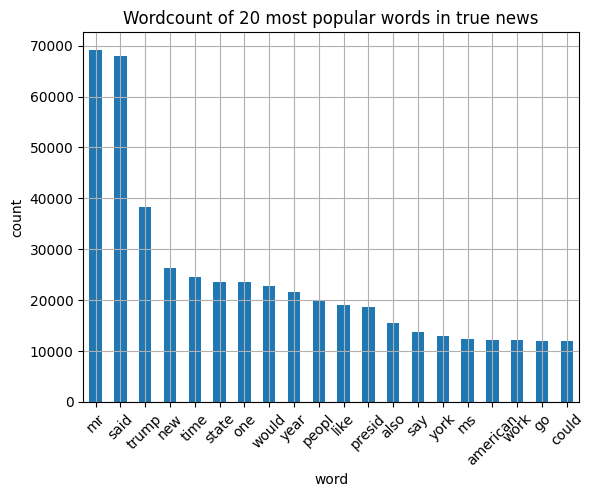

In [53]:
ax = true_counter.iloc[0:20].plot.bar(x='word',y='count', rot=45, grid=True, legend =False,
                                      title="Wordcount of 20 most popular words in true news")
ax.set_ylabel("count")
ax.text=False

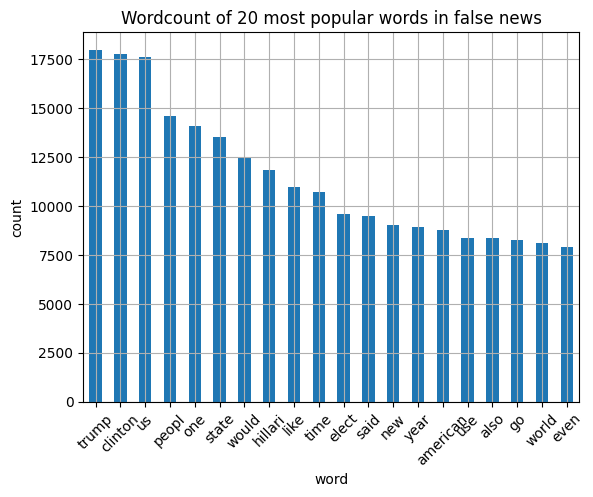

In [54]:
ax = false_counter.iloc[0:20].plot.bar(x='word',y='count', rot=45, grid=True, legend =False,
                                      title="Wordcount of 20 most popular words in false news")
ax.set_ylabel("count")
ax.text=False

### Wordcloud true/false

In [80]:
print(true_counter.head())

    word  count
0     mr  69206
1   said  68040
2  trump  38229
3    new  26265
4   time  24462


In [97]:
tr = " ".join(row for row in true_df.text)

TypeError: 'method' object is not iterable

In [102]:
true = true_df.apply(lambda row: " ".join(row['text']),axis=1)

       index                                                  0
0          1  flynn hillari clinton big woman campu breitbar...
1          5  jacki mason hollywood would love trump bomb no...
2          7  benoît hamon win french socialist parti presid...
3          9  backchannel plan ukrain russia courtesi trump ...
4         10  obama organ action partner soroslink indivis d...
...      ...                                                ...
10356  20792  jakarta bomb kill three polic offic link islam...
10357  20794  trump putin smart retali obama sanction breitb...
10358  20795  rapper ti trump poster child white supremaci j...
10359  20796  nfl playoff schedul matchup odd new york time ...
10360  20797  maci said receiv takeov approach hudson bay ne...

[10361 rows x 2 columns]


In [93]:
text = " ".join(review for review in true)

In [95]:
print(1)

1


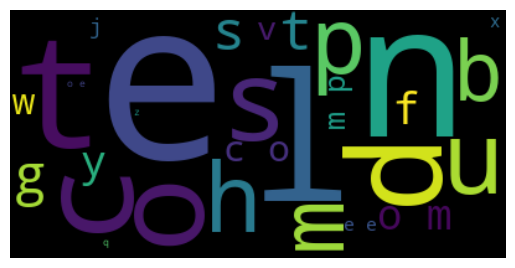

In [96]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### N-grams tru/false

### TF-IDF

### Decision Tree

### Random Forest

### Support Vector Machine (SVM)

### Naive Bayes

###  KNN (k- Nearest Neighbors)

### Which classifier has better accuracy

#### https://iopscience.iop.org/article/10.1088/1757-899X/1099/1/012040/pdf